#**NLP Introduction & Text Processing Assignment**
**Assignment Code: DS-AG-028**

##**Q.1 What is Computational Linguistics and how does it relate to NLP?**

**→** Computational Linguistics (CL) is an interdisciplinary field that combines linguistics, computer science & artificial intelligence to enable computers to understand, interpret & generate human language. It studies how natural language works & creates computational models that simulate linguistic behavior.

**Relation to NLP:**
- NLP (Natural Language Processing) is the application-oriented branch that uses computational linguistics theories to build real-world systems.
- CL focuses on understanding the structure of language, while NLP focuses on building tools such as chatbots, translators, sentiment analyzers & voice assistants.
- NLP uses algorithms, statistical models, deep learning & linguistic rules developed in computational linguistics.

##**Q.2 Briefly describe the historical evolution of Natural Language Processing.**

**→** NLP has evolved over many decades:

**1. 1950s–1960s: Rule-Based Era:**
- Alan Turing introduced the Turing Test (1950).
- Early machine translation attempts (ex.: Georgetown-IBM Project).
- Systems relied heavily on hand-crafted linguistic rules.

**2. 1970s–1980s: Expert Systems & Grammar-Based Models**
- Chomsky's generative grammar influenced NLP.
- ELIZA & PARRY were early conversational agents.
-Rule-based parsing & morphological analysis matured.

**3. 1990s: Statistical NLP Revolution**
- Shift from rule-based to probabilistic models.
- Hidden Markov Models (HMMs), POS taggers, n-gram models.
- Large corpora like the Brown Corpus became central.

**4. 2000s: Machine Learning Era**
- SVMs, CRFs, Maximum Entropy models.
- NLP pipelines became ML-driven.

**5. 2010s–Present: Deep Learning & Transformers**
- Word embeddings (Word2Vec, GloVe).
- RNNs, LSTMs, GRUs improved sequence tasks.
- Transformers (BERT, GPT, T5) revolutionized NLP with context-aware models.

##**Q.3 List and explain three major use cases of NLP in today's tech industry.**

**→** The three major use cases of NLP are as follows:

**1. Sentiment Analysis:**
- Used by companies to understand customer opinions from reviews, social media, surveys & feedback.
- It helps brands monitor satisfaction & improve products.

**2. Chatbots & Virtual Assistants:**
- NLP powers conversational agents like Siri, Alexa, Google Assistant & customer-support chatbots.
- They interpret user intent & generate meaningful responses.

**3. Machine Translation:**
- Tools like Google Translate & DeepL use NLP to translate text or speech between languages using deep learning & transformers.
- Other use cases include spam detection, summarization, named entity recognition & document classification.

##**Q.4 What is text normalization and why is it essential in text processing tasks?**

**→** Text normalization is the process of cleaning & transforming raw text into a standard, consistent format suitable for NLP tasks.

**Common Normalization Steps:**
- Lowercasing
- Removing punctuation
- Removing stopwords
- Expanding contractions (“don't → do not'')
- Spelling correction
- Tokenization
- Lemmatization/stemming

**Why it is essential:**
- Reduces complexity & noise.
- Improves model accuracy.
- Ensures consistent representation of words.
- Helps algorithms treat similar words as equal (ex.: "RUN", "Run").
- Makes downstream tasks like sentiment analysis or classification more reliable.

##**Q.5 Compare and contrast stemming and lemmatization with suitable examples.**

**→**
**Stemming:**
- Rule-based process that chops off suffixes to produce root words.
- Fast but crude & may produce non-dictionary words.
- Ex.: “running” → “run”, “studies” → “studi”.

**Lemmatization:**
- Uses vocabulary + morphological analysis.
- Produces meaningful dictionary words (lemmas).
- Slower but more accurate.
- Ex.: “studies” → “study”, “better” → “good”.

##**Q.6 Write a Python program that uses regular expressions (regex) to extract all email addresses from the following block of text: “Hello team, please contact us at support@xyz.com for technical issues, or reach out to our HR at hr@xyz.com. You can also connect with John at john.doe@xyz.org and jenny via jenny_clarke126@mail.co.us. For partnership inquiries, email partners@xyz.biz.”**

**→**

In [ ]:
import re

text = (
    "Hello team, please contact us at support@xyz.com for technical issues, or reach out to "
    "our HR at hr@xyz.com. You can also connect with John at john.doe@xyz.org and jenny "
    "via jenny_clarke126@mail.co.us. For partnership inquiries, email partners@xyz.biz."
)
pattern = r"[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}"
emails = re.findall(pattern, text)

print("Extracted emails:")
for e in emails:
    print("-", e)

Extracted emails:
- support@xyz.com
- hr@xyz.com
- john.doe@xyz.org
- jenny_clarke126@mail.co.us
- partners@xyz.biz


##**Q.7 Given the sample paragraph below, perform string tokenization and frequency distribution using Python and NLTK: “Natural Language Processing (NLP) is a fascinating field that combines linguistics, computer science & artificial intelligence. It enables machines to understand, interpret & generate human language. Applications of NLP include chatbots, sentiment analysis & machine translation. As technology advances, the role of NLP in modern solutions is becoming increasingly critical.”**

**→**

Total tokens: 50
Unique tokens: 43
Top 10 words: [('nlp', 3), ('and', 3), ('language', 2), ('is', 2), ('of', 2), ('natural', 1), ('processing', 1), ('a', 1), ('fascinating', 1), ('field', 1)]


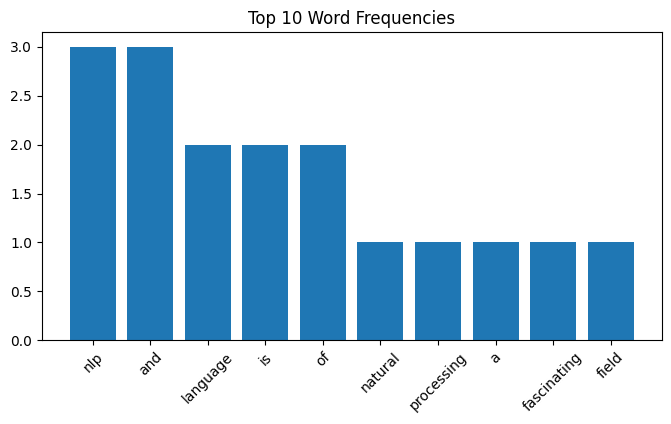

In [ ]:

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

text = """Natural Language Processing (NLP) is a fascinating field that combines linguistics,
computer science & artificial intelligence. It enables machines to understand,
interpret & generate human language. Applications of NLP include chatbots,
sentiment analysis & machine translation. As technology advances, the role of NLP
in modern solutions is becoming increasingly critical."""

tokenizer = RegexpTokenizer(r"[A-Za-z]+")
tokens = [t.lower() for t in tokenizer.tokenize(text)]
fdist = FreqDist(tokens)

print("Total tokens:", len(tokens))
print("Unique tokens:", len(fdist))
print("Top 10 words:", fdist.most_common(10))

words, counts = zip(*fdist.most_common(10))
plt.figure(figsize=(8,4))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("Top 10 Word Frequencies")
plt.show()

##**Q.8 Create a custom annotator using spaCy or NLTK that identifies and labels proper nouns in a given text.**

**→**

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk import pos_tag

for pkg in ["averaged_perceptron_tagger", "averaged_perceptron_tagger_eng"]:
    try:
        nltk.download(pkg, quiet=True)
    except Exception:
        pass
tokenizer = RegexpTokenizer(r"[A-Za-z]+")

def proper_noun_annotator(text):
    tokens = tokenizer.tokenize(text)
    tags = pos_tag(tokens)
    return [(word, "PROPN") for (word, tag) in tags if tag in ("NNP", "NNPS")]

text = "Suraj and Priya traveled from Mumbai to Los Angeles to meet Sundar Pichai at Google HQ."
annotations = proper_noun_annotator(text)

print("Text:", text)
print("Proper noun annotations:")
for item in annotations:
    print(item)


Text: Suraj and Priya traveled from Mumbai to Los Angeles to meet Sundar Pichai at Google HQ.
Proper noun annotations:
('Suraj', 'PROPN')
('Priya', 'PROPN')
('Mumbai', 'PROPN')
('Los', 'PROPN')
('Angeles', 'PROPN')
('Sundar', 'PROPN')
('Pichai', 'PROPN')
('Google', 'PROPN')
('HQ', 'PROPN')


##**Q.9 Using Genism, demonstrate how to train a simple Word2Vec model on the following dataset consisting of example sentences:**
dataset = [ "Natural language processing enables computers to understand human language", "Word embeddings are a type of word representation that allows words with similar meaning to have similar representation", "Word2Vec is a popular word embedding technique used in many NLP applications", "Text preprocessing is a critical step before training word embeddings", "Tokenization and normalization help clean raw text for modeling"]
##**Write code that tokenizes the dataset, preprocesses it & trains a Word2Vec model using Gensim.**

**→**

In [ ]:
!pip -q install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 26.7 MB/s eta 0:00:00


In [ ]:
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec

dataset = ["Natural language processing enables computers to understand human language",
 "Word embeddings are a type of word representation that allows words with similar meaning to have similar representation",
 "Word2Vec is a popular word embedding technique used in many NLP applications",
 "Text preprocessing is a critical step before training word embeddings",
 "Tokenization and normalization help clean raw text for modeling"]

tokenized = [simple_preprocess(s) for s in dataset]
model = Word2Vec(
    sentences=tokenized,
    vector_size=50,
    window=3,
    min_count=1,
    workers=1,
    sg=1,
    seed=42
)

print("Vocabulary size:", len(model.wv))
print("First 15 vocab words:", list(model.wv.key_to_index.keys())[:15])
print("Most similar to 'language':", model.wv.most_similar("language", topn=3))

Vocabulary size: 45
First 15 vocab words: ['word', 'text', 'is', 'similar', 'representation', 'embeddings', 'to', 'language', 'modeling', 'for', 'raw', 'clean', 'help', 'normalization', 'and']
Most similar to 'language': [('are', 0.2118324488401413), ('is', 0.1903323531150818), ('natural', 0.14105801284313202)]


##**Q.10 Imagine you are a data scientist at a fintech startup. You've been tasked with analyzing customer feedback. Outline the steps you would take to clean, process & extract useful insights using NLP techniques from thousands of customer reviews.**

**→ Steps to clean, process & extract useful insights as follows:**

**1. Data Collection:** Gather reviews from app, website, CRM, emails.

**2. Cleaning:**
- Remove emojis, URLs, HTML tags
- Lowercasing
- Remove punctuation & stopwords

**3. Tokenization & Normalization:**
- Lemmatization
- Spelling correction

**4. Feature Extraction:**
- TF-IDF
- Sentiment scores
- Named Entity Recognition
- Topic Modeling (LDA)

**5. Modeling:**
- Sentiment Classification (positive/negative)
- Topic extraction (loan issues, payments, card usage)

**6. Visualization:**
- Word clouds
- Bar charts of sentiment distribution

**7. Insight Reporting:**
- Identify pain points
- Recommend product improvements.

**Sample Code:**

In [20]:
import re
import pandas as pd
import numpy as np

reviews = ["The app is great, but the transaction fee is too high!",
    "Refund is taking too long. Support is not responding.",
    "Love the UI. Fast payments and easy to use.",
    "Login issue after update, cannot access my account.",
    "Charges are hidden. Very bad experience with billing."]

def text(s):
    s = s.lower()
    s = re.sub(r"http\S+|www\.\S+", " ", s)
    s = re.sub(r"\S+@\S+", " ", s)
    s = re.sub(r"[^a-z\s]", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s
cleaned = [text(r) for r in reviews]

import nltk
nltk.download("vader_lexicon", quiet=True)
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
scores = [sia.polarity_scores(t)["compound"] for t in cleaned]

def label(c):
    if c >= 0.05: return "Positive"
    if c <= -0.05: return "Negative"
    return "Neutral"
df = pd.DataFrame({
    "review": reviews,
    "cleaned": cleaned,
    "compound": scores,
    "sentiment": [label(c) for c in scores]
})

print(df[["sentiment", "compound", "review"]])

from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(stop_words="english", ngram_range=(1,2), max_features=15)
X = vec.fit_transform(cleaned)
terms = np.array(vec.get_feature_names_out())
weights = np.asarray(X.sum(axis=0)).ravel()
top_idx = weights.argsort()[::-1]

print("\nTop keywords/phrases (TF-IDF):")
for i in top_idx[:10]:
    print("-", terms[i], ":", round(weights[i], 3))

  sentiment  compound                                             review
0  Positive    0.3716  The app is great, but the transaction fee is t...
1  Positive    0.4019  Refund is taking too long. Support is not resp...
2  Positive    0.7964        Love the UI. Fast payments and easy to use.
3   Neutral    0.0000  Login issue after update, cannot access my acc...
4  Negative   -0.7089  Charges are hidden. Very bad experience with b...

Top keywords/phrases (TF-IDF):
- app great : 0.707
- app : 0.707
- fast : 0.577
- access account : 0.577
- account : 0.577
- easy : 0.577
- easy use : 0.577
- access : 0.577
- charges hidden : 0.378
- experience billing : 0.378
